In [1]:
import geopandas as gpd

rivers = gpd.read_file(r"C:\dev\05_geodata\landuse\ETAK_EESTI_GPKG\ETAK_EESTI_GPKG.gpkg", layer='E_203_vooluveekogu_j')

In [2]:
rivers.describe()

,andmeallika_id,korgusallika_id,ruumikujuallika_id,etak_id,kood,tyyp,telje_tyyp,laius,telje_staatus,knr_id,vajalik
count,845862.000000,845862.000000,845862.000000,8.458620e+05,845862.0,845862.000000,845862.000000,845862.000000,845862.000000,7.744100e+04,845862.000000
mean,133.665494,218.786977,128.775105,3.882074e+06,203.0,46.819836,10.099697,19.326651,10.118766,5.939113e+06,29.999870
std,57.774549,83.015654,62.130273,1.864343e+06,0.0,9.605360,1.407162,10.592388,1.083310,2.365394e+07,0.113518
min,1.000000,55.000000,1.000000,2.172708e+06,203.0,10.000000,10.000000,10.000000,10.000000,6.583000e+03,10.000000
25%,90.000000,210.000000,76.000000,2.517362e+06,203.0,50.000000,10.000000,10.000000,10.000000,6.695000e+03,30.000000
50%,147.000000,210.000000,147.000000,2.825550e+06,203.0,50.000000,10.000000,20.000000,10.000000,6.848000e+03,30.000000
75%,173.000000,210.000000,173.000000,5.751486e+06,203.0,50.000000,10.000000,20.000000,10.000000,7.610000e+03,30.000000
max,214.000000,999.000000,214.000000,7.637365e+06,203.0,50.000000,30.000000,60.000000,20.000000,1.003861e+08,40.000000


In [3]:
rivers.dtypes

valjavote               object
muutmisaeg              object
geom_muutmisaeg         object
andmeallika_id           int64
korgusallika_id          int64
ruumikujuallika_id       int64
etak_id                  int64
kood                     int64
kood_t                  object
tyyp                     int64
tyyp_t                  object
telje_tyyp               int64
telje_tyyp_t            object
laius                    int64
laius_t                 object
telje_staatus            int64
telje_staatus_t         object
kkr_kood                object
knr_id                 float64
nimetus                 object
mps_id                  object
markused                object
vajalik                  int64
vajalik_t               object
geometry              geometry
dtype: object

In [4]:
rivers.crs

<Projected CRS: PROJCS["Estonia_1997_Estonia_National_Grid",GEOGCS ...>
Name: Estonia_1997_Estonia_National_Grid
Axis Info [cartesian]:
- [east]: Easting (METER)
- [north]: Northing (METER)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: unnamed
- Ellipsoid: GRS_1980
- Prime Meridian: Greenwich

In [5]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import datashader as ds
import datashader.transfer_functions as tf

from functools import partial

from datashader.utils import export_image
from datashader.colors import colormap_select, Hot, viridis

In [6]:
rivers['cent_x'] = rivers['geometry'].apply(lambda x: x.centroid.x)

In [7]:
rivers['cent_y'] = rivers['geometry'].apply(lambda x: x.centroid.y)

In [8]:
background = 'black'

# a "partially applied" convenience function for saving the image
export = partial(export_image, background = background, export_path=".")

# this "partially applied" convenience function handles colorizing of the image, incl reversing your colormap if you like
cm = partial(colormap_select, reverse=False)


In [9]:
rivers.total_bounds

array([ 373559.669, 6377128.388,  739420.95 , 6615024.21 ])

In [12]:
x = 739420.95 - 373559.669
y = 6615024.21 - 6377128.388

print(f"{x} / {y}")

365861.28099999996 / 237895.8219999997


In [13]:
x_factor = x / y

print(x_factor)

1.5379054492180213


In [47]:
w = 800 *2
h = int(w / x_factor)

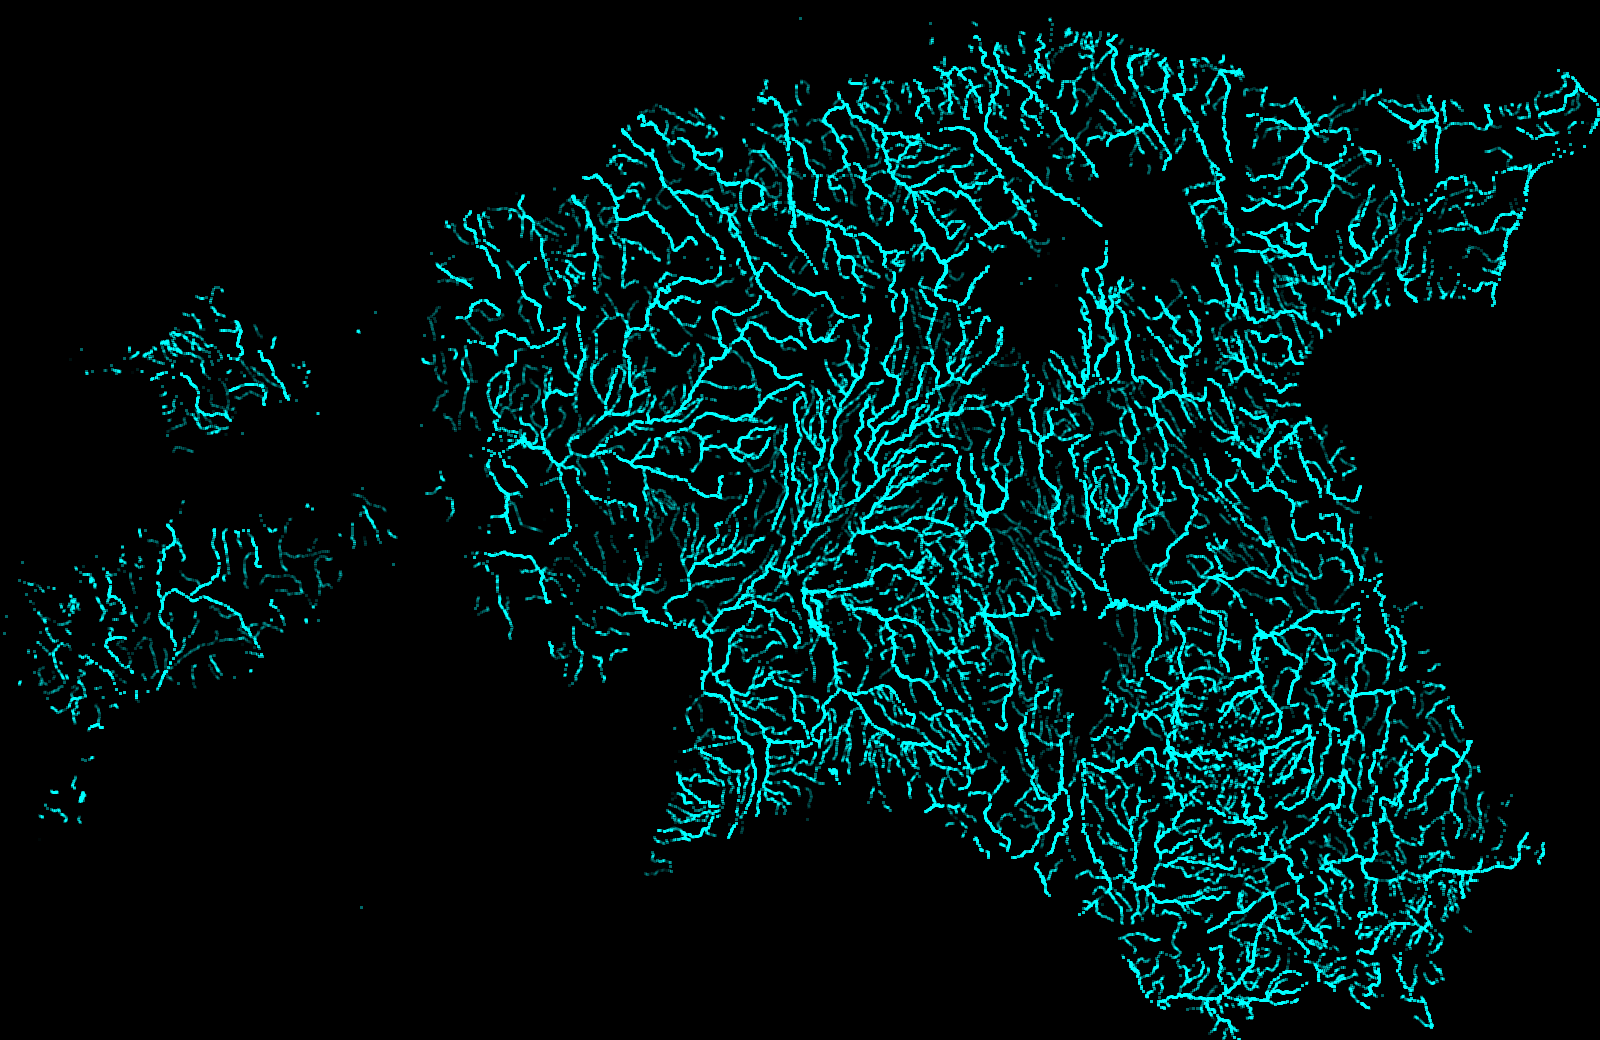

In [48]:
cvs = ds.Canvas(plot_width=w, plot_height=h)

# "tyyp" denotes the "magnitude" of the river, 50-river, 40-stream ... channel, 10-ditch
agg = cvs.points(rivers, 'cent_x', 'cent_y', ds.mean('tyyp'))

# to change color map you culd could use the parameter cmap=cm(viridis) or cmap=cm(Hot)
shaded = tf.shade(agg, cmap=cm(['cyan','black'], False), how='linear', alpha=210, min_alpha=150)

img_dyn = tf.spread(shaded, px=1, how='add')

img = tf.set_background(img_dyn, background)

img

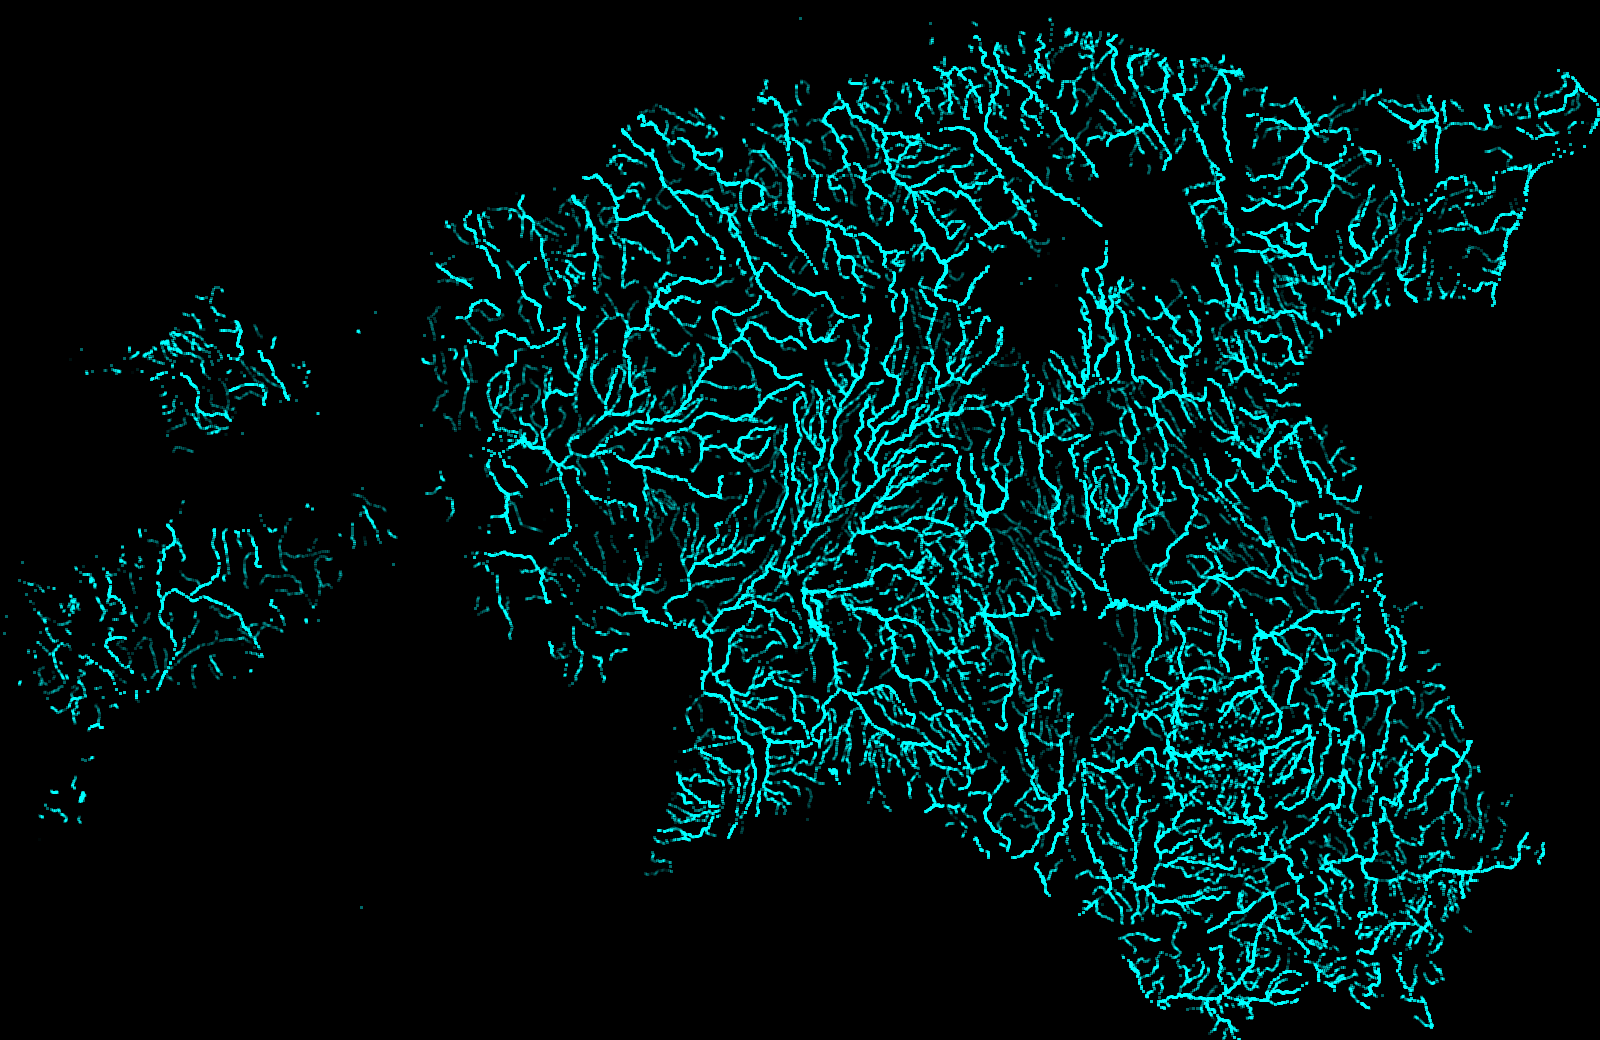

In [49]:
export(img,'../source/_static/day-02-river-lines')


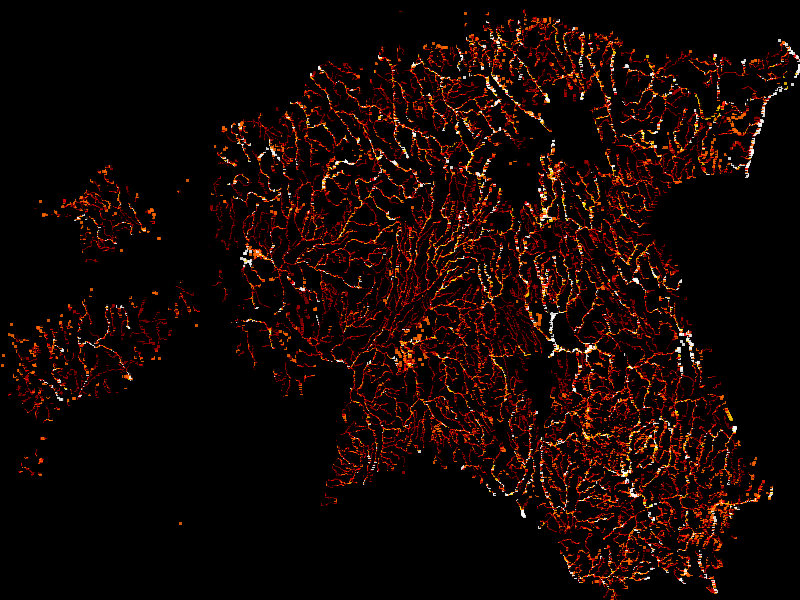

In [117]:
# to change color map you culd could use the parameter cmap=cm(viridis) or cmap=cm(Hot)
shaded = tf.shade(agg, cmap=cm(Hot, False), how='linear', alpha=210, min_alpha=150)

img_dyn = tf.spread(shaded, px=1, how='over')

img = tf.set_background(img_dyn, background)

img